In [1]:
import re
import pickle
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager
from collections import Counter
from collections import defaultdict
from konlpy.tag import Komoran

In [4]:
# minus
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# Data Import

In [5]:
with open('./text/final_text.bin', 'rb') as f:
    final_text= pickle.load(f)

# Preprocessing

In [6]:
def preprocessing(text):
    result= ''
    for ch in text:
        if ch in string.punctuation:
            result += ' '
        else:
            result += ch
    result = ' '.join(result.split())  # '\n'을 제거하기 위해 split() 후 다시 합침
    result= re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',result)
    while '  ' in result:
        result= re.sub('  ',' ', result)
    return result

In [7]:
cleansed_text= preprocessing(final_text)

In [8]:
def return_morph(text):
    import MeCab
    from konlpy.tag import Mecab
    mecab= Mecab(dicpath= 'C:\\mecab\\mecab-ko-dic')
    result= mecab.morphs(text)
    result= [res for res in result if len(res) >= 2 and res not in ['으로','위해','에서','위한','대한','부터','따라','까지','도록','으며','한다','였으며','또한','통해',
                                                                   '관한','된다','으로써']]
    return result

In [9]:
morphs= return_morph(cleansed_text)
top_200= dict(Counter(morphs).most_common(200))

# n-gram

In [10]:
# ngram function
def to_ngrams(morphs, n):
    ngrams= []
    for i in range(0, len(morphs) - n + 1):
        ngrams.append(tuple(morphs[i:i+n]))
    return ngrams

In [ ]:
# bigram 예시
to_ngrams(morphs, 2)

In [16]:
komoran= Komoran()

words= []
for morph in morphs:
    words.append(komoran.pos(morph))

In [30]:
ngram_counter = defaultdict(int)

for word in words:
    for string, pos in word:
        ngram_counter[string] +=1

In [31]:
ngram_counter

defaultdict(int,
            {'평균': 140,
             '수명': 11,
             '상하수도': 38,
             '보급': 289,
             '증가': 416,
             '근로': 10,
             '시간': 132,
             '감축': 467,
             '일부': 117,
             '지표': 204,
             '개선': 1014,
             '으나': 235,
             '온실': 522,
             '가스': 653,
             '배출': 1728,
             '빈곤': 14,
             '인구': 123,
             '비율': 181,
             '산림': 65,
             '갯벌': 112,
             '면적': 140,
             '감소': 198,
             '사회': 534,
             '형평': 21,
             '환경': 7528,
             '악화': 56,
             '나타나': 174,
             '았': 198,
             '기본': 433,
             '계획': 1914,
             '이행': 497,
             '과제': 190,
             '전반기': 2,
             '추진': 1778,
             '상황': 115,
             '점검': 299,
             '지속': 1203,
             '가능': 1033,
             '발전': 563,
             '평가': 1095,
             '이루': 57

In [43]:
class NgramTokenizer:

    def __init__(self, ngrams, base_tokenizer, n_range=(1, 3)):
        self.ngrams = ngrams
        self.base_tokenizer = base_tokenizer
        self.n_range = n_range

    def __call__(self, sent):
        return self.tokenize(sent)

    def tokenize(self, sent):
        if not sent:
            return []

        unigrams = self.base_tokenizer.pos(sent, join=True)

        n_begin, n_end = self.n_range
        ngrams = []
        for n in range(n_begin, n_end + 1):
            for ngram in self._to_ngram(unigrams, n):
                ngrams.append('-'.join(ngram))
        return ngrams

    def _to_ngrams(self, words, n):
        ngrams = []
        for b in range(0, len(words) - n + 1):
            ngram = tuple(words[b:b+n])
            if ngram in self.ngrams:
                ngrams.append(ngram)
        return ngrams

ngram_tokenizer = NgramTokenizer(ngram_counter, komoran)

In [ ]:
ngram_tokenizer(cleansed_text)

# WordCloud

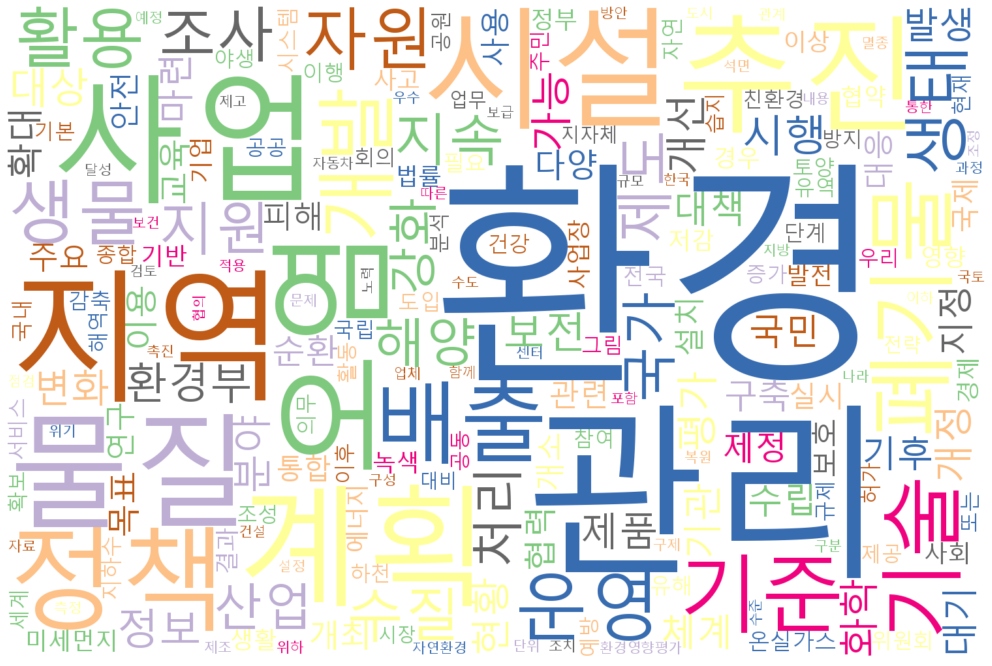

In [16]:
wordcloud= WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(top_200)
fig = plt.figure(figsize= (25,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()